In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [114]:
sns.set_style("dark", {'ytick.major.size': 10.0})
sns.set_context("poster", font_scale=1.1)

In [184]:
path = "./input/"
sessions = pd.read_csv(path + "sessions.csv", na_values = '-unknown-')
train = pd.read_csv(path + "train_users_2.csv", na_values = '-unknown-')
test = pd.read_csv(path + "test_users.csv", na_values = '-unknown-')

In [94]:
#Basic Shape of the data set
print("In Train Dataset we have " + str(train.shape[0]) + ' rows and ' + str(train.shape[1]) + ' columns')

print("In Test Dataset we have " + str(test.shape[0]) + ' rows and ' + str(test.shape[1]) + ' columns')

In Train Dataset we have 213451 rows and 16 columns
In Test Dataset we have 62096 rows and 15 columns


In [146]:
#merging datasets
df_all = pd.concat((train, test), axis = 0, ignore_index = True )

# Missing Data

In [96]:
null_count = df_all.isnull().sum()

In [97]:
print(null_count)

affiliate_channel               0
affiliate_provider              0
age                        116866
country_destination         62096
date_account_created            0
date_first_booking         186639
first_affiliate_tracked      6085
first_browser               44394
first_device_type               0
gender                     129480
id                              0
language                        1
signup_app                      0
signup_flow                     0
signup_method                   0
timestamp_first_active          0
dtype: int64


In [98]:
print(null_count/df_all.shape[0])

affiliate_channel          0.000000
affiliate_provider         0.000000
age                        0.424124
country_destination        0.225355
date_account_created       0.000000
date_first_booking         0.677340
first_affiliate_tracked    0.022083
first_browser              0.161112
first_device_type          0.000000
gender                     0.469902
id                         0.000000
language                   0.000004
signup_app                 0.000000
signup_flow                0.000000
signup_method              0.000000
timestamp_first_active     0.000000
dtype: float64


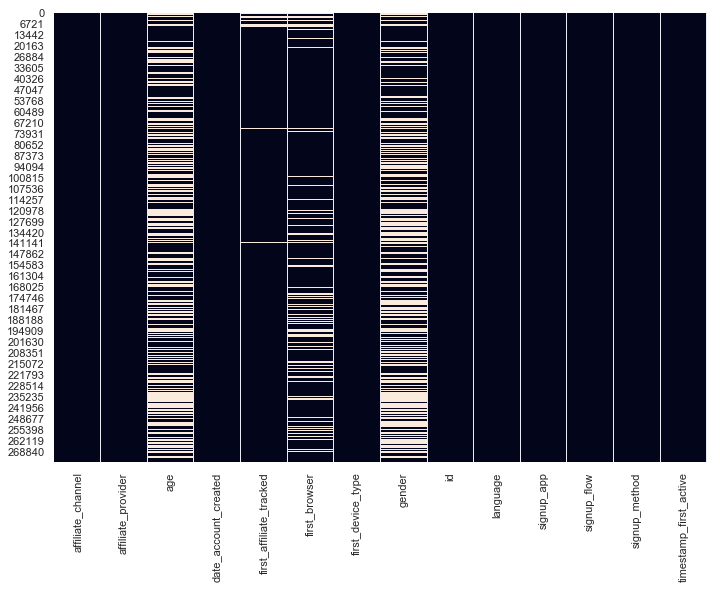

In [99]:
#visualizing missing data
a4_dims = (11.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)
data = df_all.drop(['country_destination', 'date_first_booking'], axis = 1)
sns.heatmap(ax = ax, data = data.isnull(), cbar=False)

In [100]:
df_all['date_account_created'] = pd.to_datetime(df_all['date_account_created'])
df_all['date_first_booking'] = pd.to_datetime(df_all['date_first_booking'])
df_all['date_first_active'] = pd.to_datetime(df_all['timestamp_first_active'], format='%Y%m%d%H%M%S')

# Gender EDA

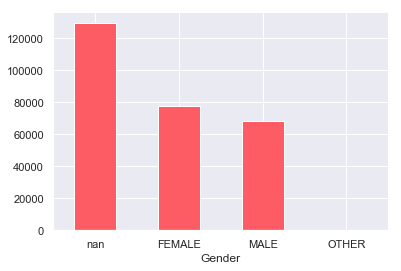

In [103]:
sns.set(font_scale=1)  # crazy big
df_all.gender.value_counts(dropna=False).plot(kind='bar', color='#FD5C64', rot=0)
plt.xlabel('Gender')
sns.despine()

Here, we see that Nan values are high.

# Plotting Destinations

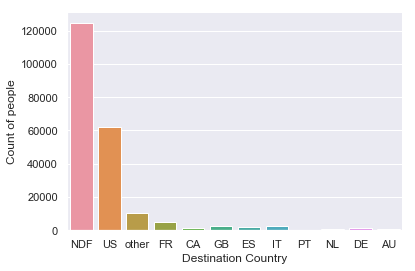

In [107]:
sns.countplot(x="country_destination", data=df_all)
plt.xlabel('Destination Country')
plt.ylabel('Count of people')
sns.despine()

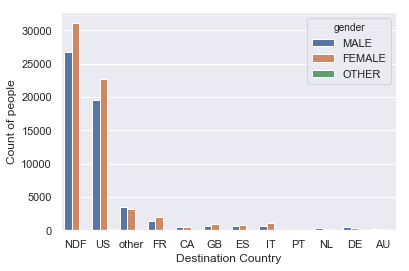

In [108]:
sns.countplot(x="country_destination", data=df_all, hue = "gender")
plt.xlabel('Destination Country')
plt.ylabel('Count of people')
sns.despine()

## Only comparing users who book destinations

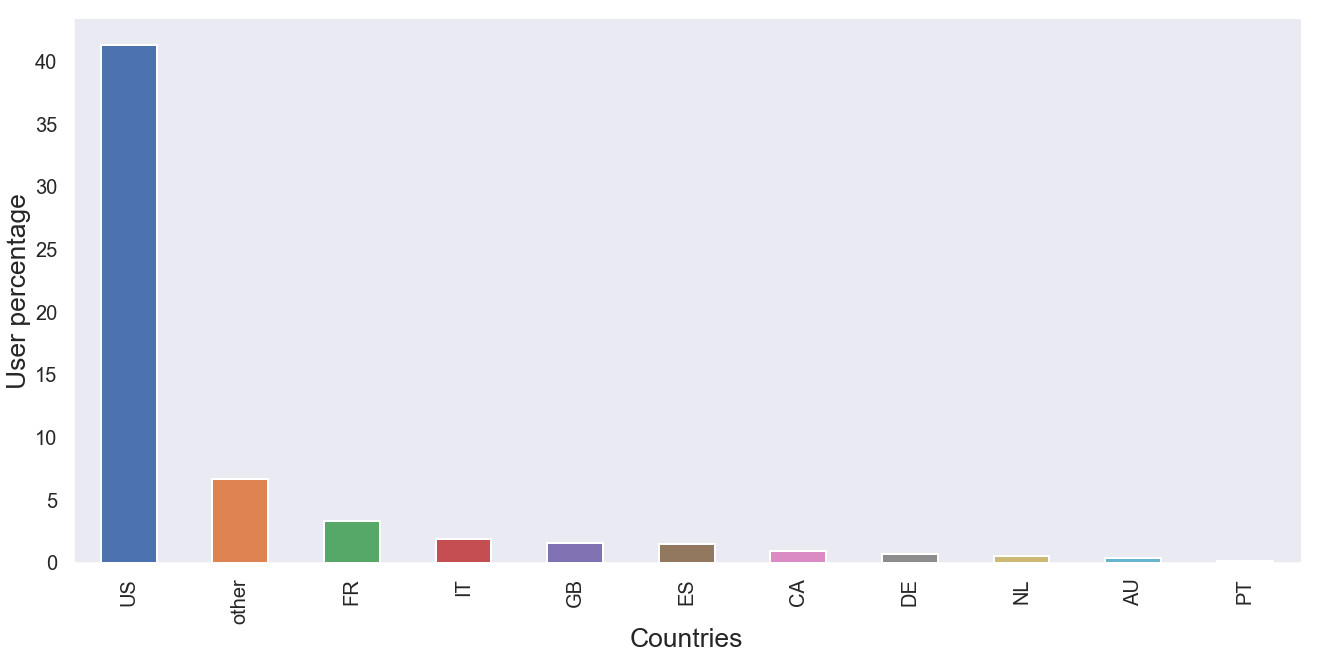

In [120]:
users_who_book = df_all[df_all.country_destination != "NDF"]

destination_percentage = users_who_book.country_destination.value_counts() / users_who_book.shape[0]*100 #shape[0] is number of observation

destination_percentage.plot(kind='bar',figsize=(22,10),fontsize=20)
plt.xlabel("Countries")

plt.ylabel("User percentage")
sns.despine()

For people the book holidays before, most people book holidays in the US

In [121]:
def process_age(users):
    ''' Function takes in the user data frame and cleans ages.'''
    
    #Assume ages > year 1930 are the year born of people. Derive ages from that year
    users['age'] = users['age'].apply(lambda x: x-2014 if x > 1920 else x)
    
    #take away age outliers > 10 or < 13
    users['age'] = users['age'].apply(lambda x: np.nan if x > 100 or x < 13 else x)
    
    return users

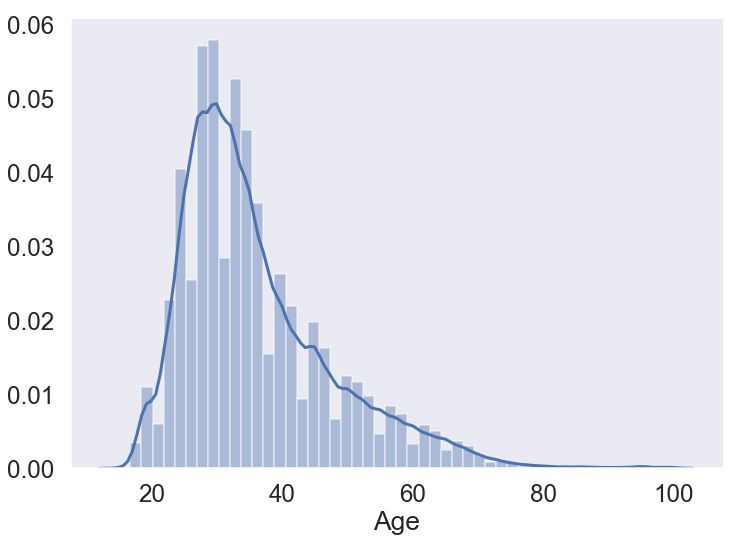

In [122]:
df_all = process_age(df_all)

a4_dims = (11.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)
sns.distplot(df_all.age.dropna(), ax = ax)
plt.xlabel('Age')
sns.despine()

Most travellers are between 20-40 years old

### Binning Age to help with labeling

In [154]:
def bin_age(age):
    if age < 30:
        return "young"
    elif age >= 30 and age<=50:
        return "middle"
    elif age >= 50:
        return "old"
    else:
        return np.NaN

In [155]:
binnedAge = pd.DataFrame(df_all.age.apply(lambda x: bin_age(x)))

In [159]:
df_all['age_bins'] = binnedAge

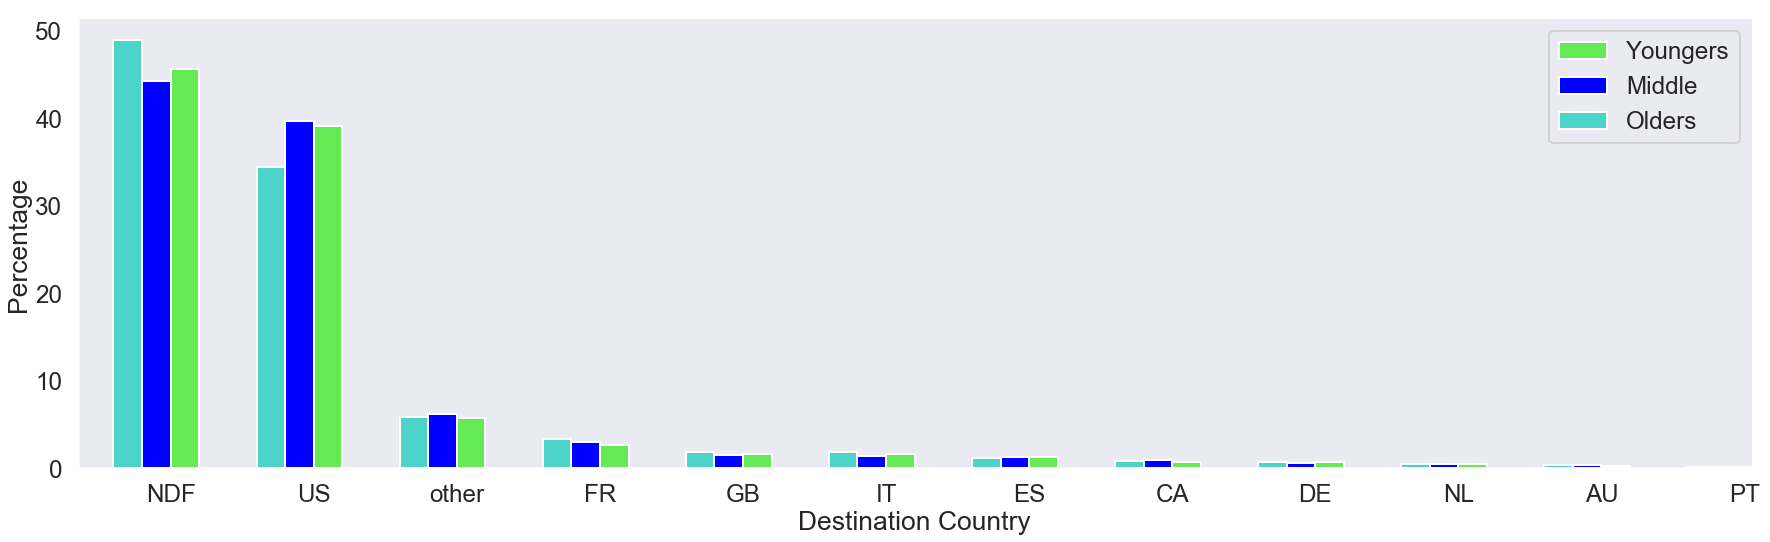

In [166]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 30,8.27

width = 0.2

younger = sum(df_all.loc[df_all['age_bins'] == 'young', 'country_destination'].value_counts())
middle = sum(df_all.loc[df_all['age_bins'] == 'middle', 'country_destination'].value_counts())
older = sum(df_all.loc[df_all['age_bins'] == 'old', 'country_destination'].value_counts())


younger_destinations = df_all.loc[df_all['age_bins'] == 'young', 'country_destination'].value_counts() / younger * 100
middle_destinations = df_all.loc[df_all['age_bins'] == 'middle', 'country_destination'].value_counts() / middle * 100
older_destinations = df_all.loc[df_all['age_bins'] == 'old', 'country_destination'].value_counts() / older * 100

younger_destinations.plot(kind='bar', width=width, color='#63EA55', position=0, label='Youngers', rot=0)
middle_destinations.plot(kind='bar', width=width, color='blue', position=1, label='Middle', rot=0)
older_destinations.plot(kind='bar', width=width, color='#4DD3C9', position=2, label='Olders', rot=0)

plt.legend()
plt.xlabel('Destination Country')
plt.ylabel('Percentage')

sns.despine()
plt.show()

# Language Spoken

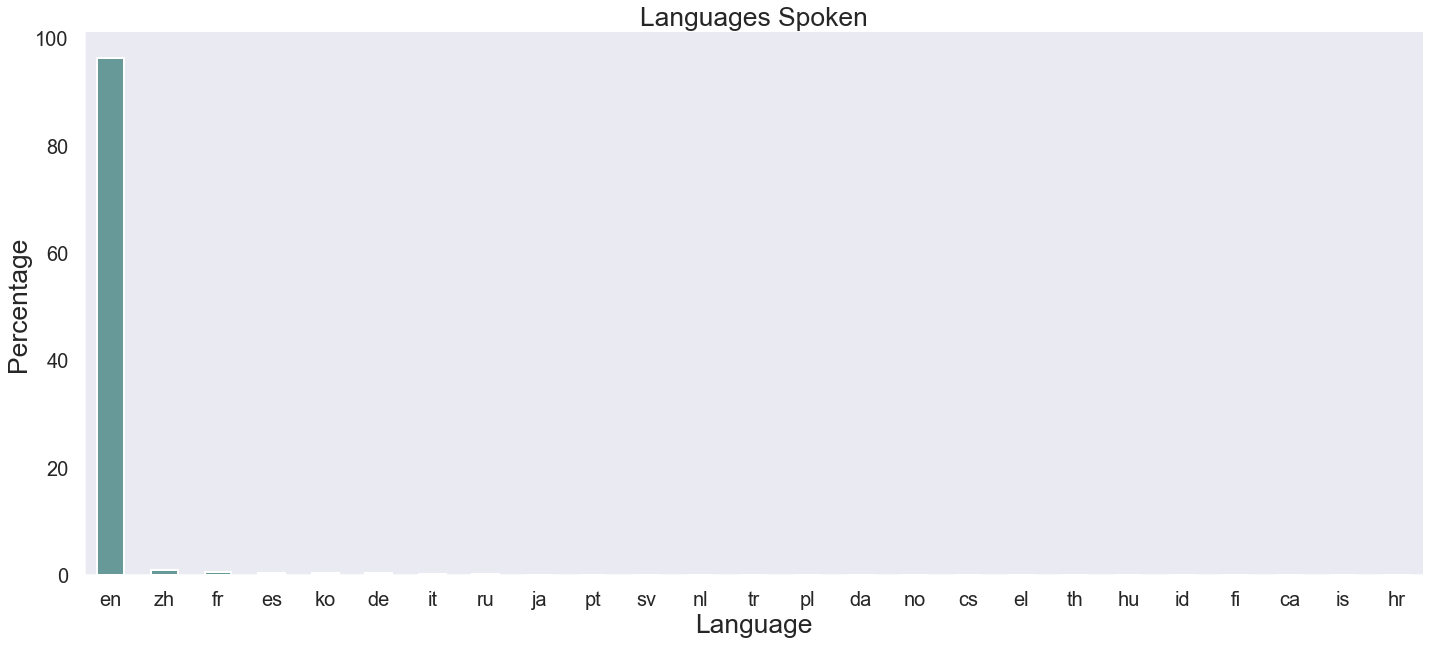

In [172]:
user_languages = df_all.language.value_counts() / df_all.shape[0] * 100
user_languages.plot(kind='bar',color='#689999',rot=0,figsize=(24,10),fontsize=20)
plt.title("Languages Spoken")

plt.xlabel('Language')
plt.ylabel('Percentage')
sns.despine()

# Take away english to see distirbution of minority languages

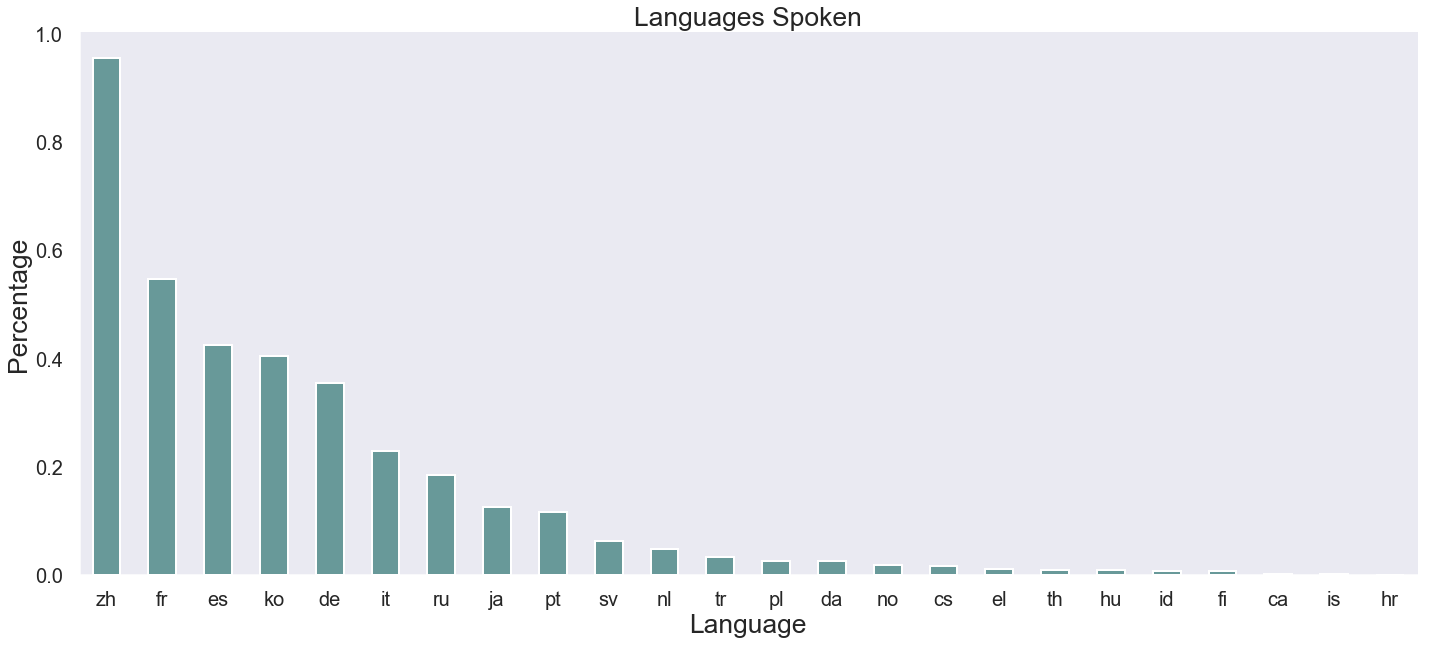

In [173]:
user_languages = df_all[df_all.language!= "en"].language.value_counts() / df_all.shape[0] * 100
user_languages.plot(kind='bar',color='#689999',rot=0,figsize=(24,10),fontsize=20)
plt.title("Languages Spoken")

plt.xlabel('Language')
plt.ylabel('Percentage')
sns.despine()

# First Date booking

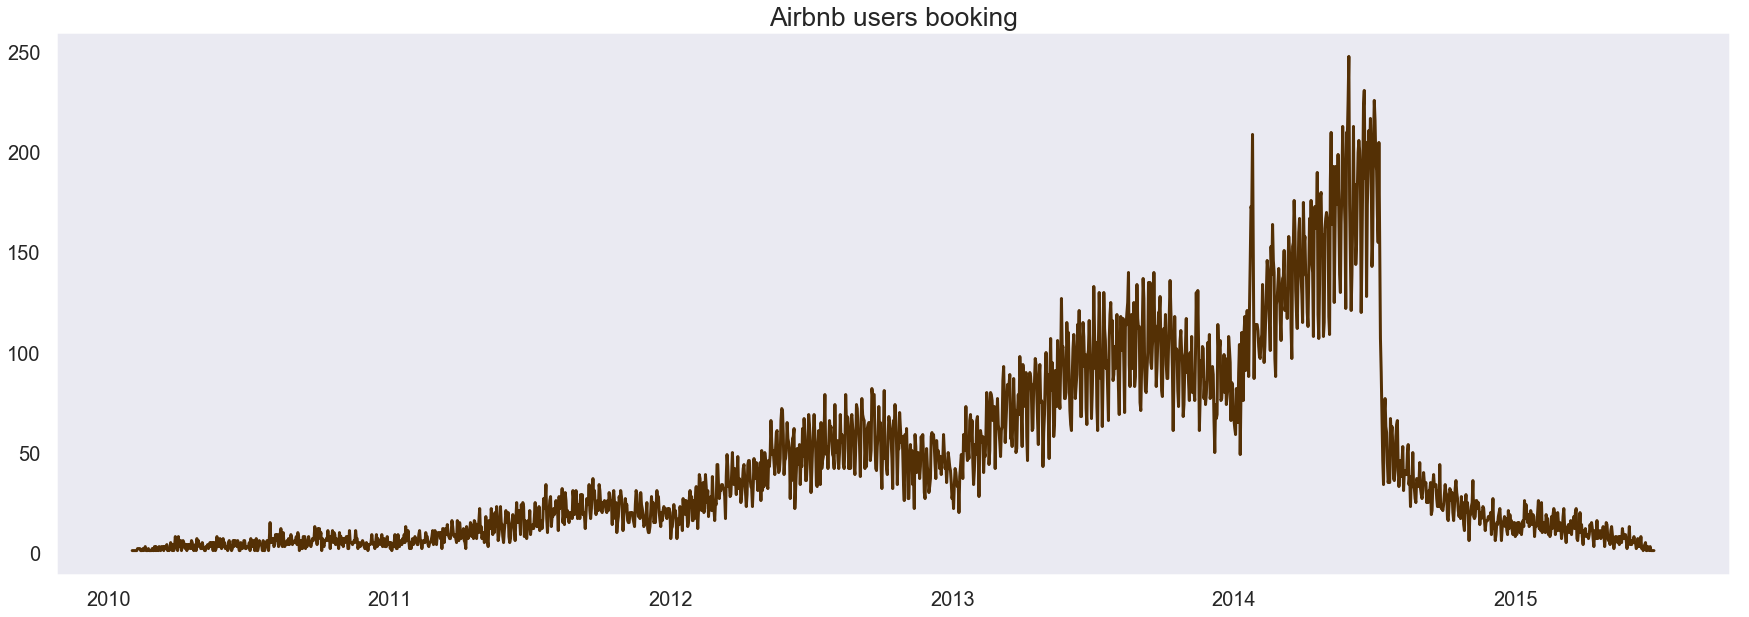

In [176]:
book_user = df_all.dropna(subset=['date_first_booking']) #Delete NaN value from date_first_booking column
df =  book_user.groupby(['date_first_booking']).size().reset_index()
ts = pd.Series(df[0].values, index=pd.date_range(start='2/1/2010', end='30/6/2015'))
ax  = ts.plot(title="Airbnb users booking",colormap='BrBG',figsize=(30,10),fontsize=20)

# Sesssions Dataset

In [237]:
def f_plot(feature, df = df_all, figsize=(10,5), rot = False, degree = 30): 
    fig, ax = plt.subplots(figsize=a4_dims)
    if rot == True:
        ax.set_xticklabels(ax.get_xticklabels(),rotation=degree)

    f_count = df_all[feature].value_counts()
    sns.barplot(f_count.index.values, f_count.values, ax = ax)
    plt.xlabel(feature)
    plt.ylabel('Count')

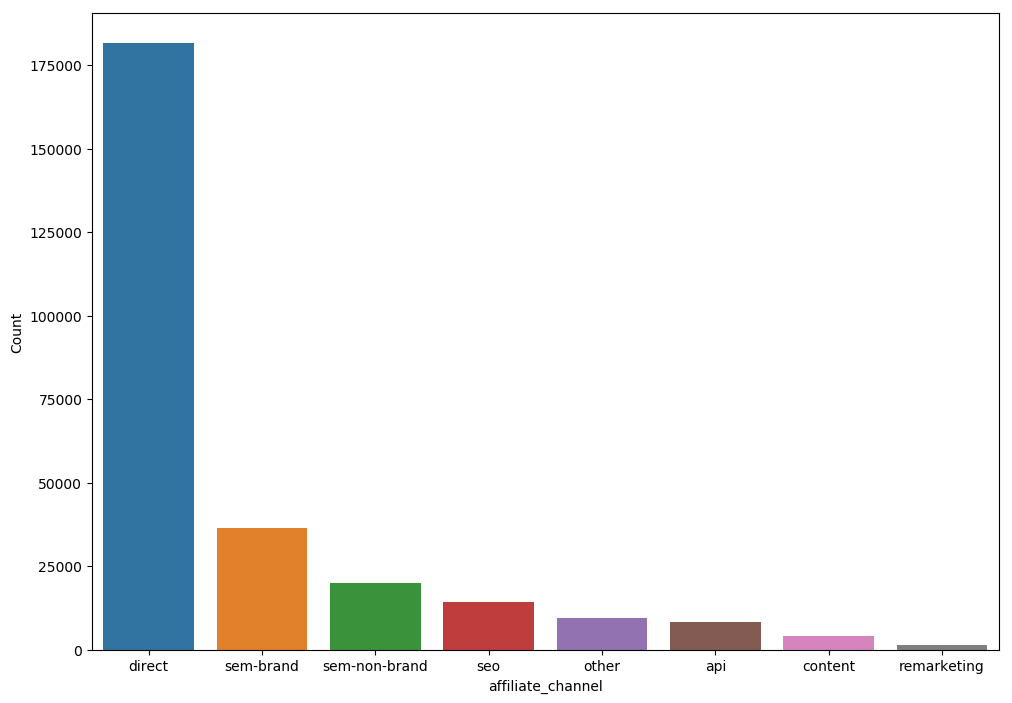

In [234]:
sns.reset_defaults()

f_plot('affiliate_channel')

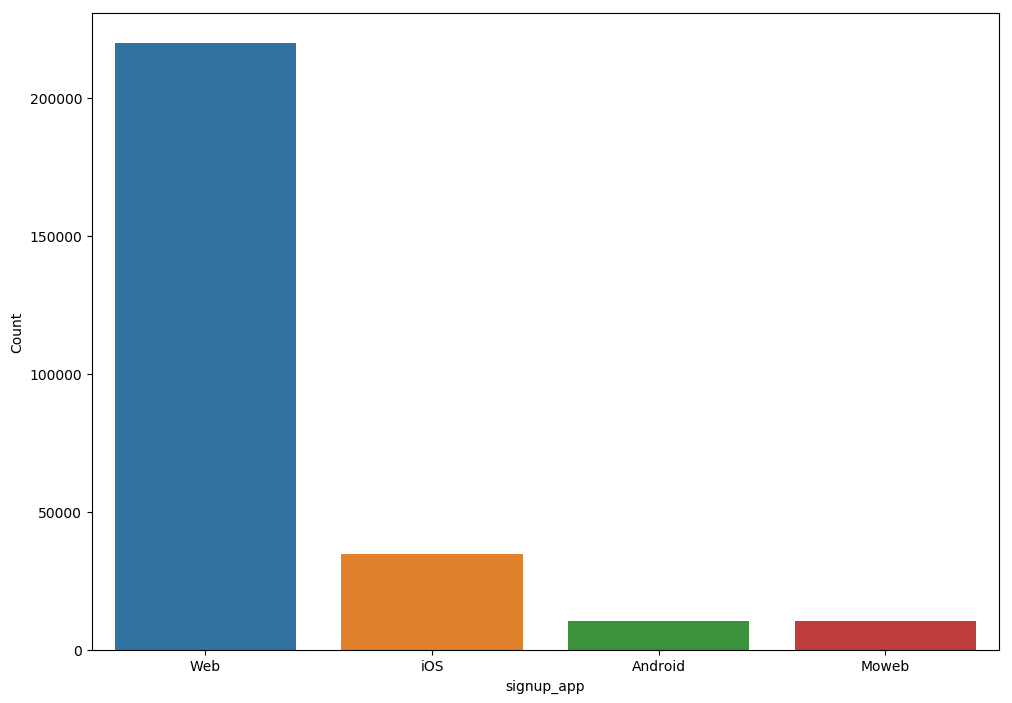

In [224]:
f_plot('signup_app')

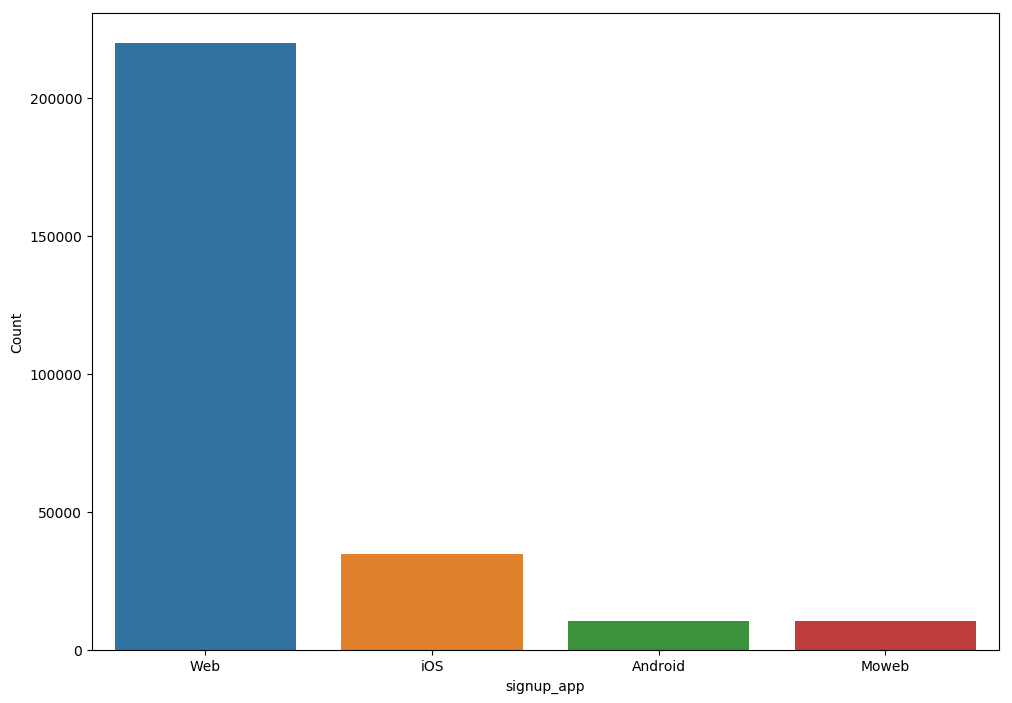

In [225]:
f_plot('signup_app')

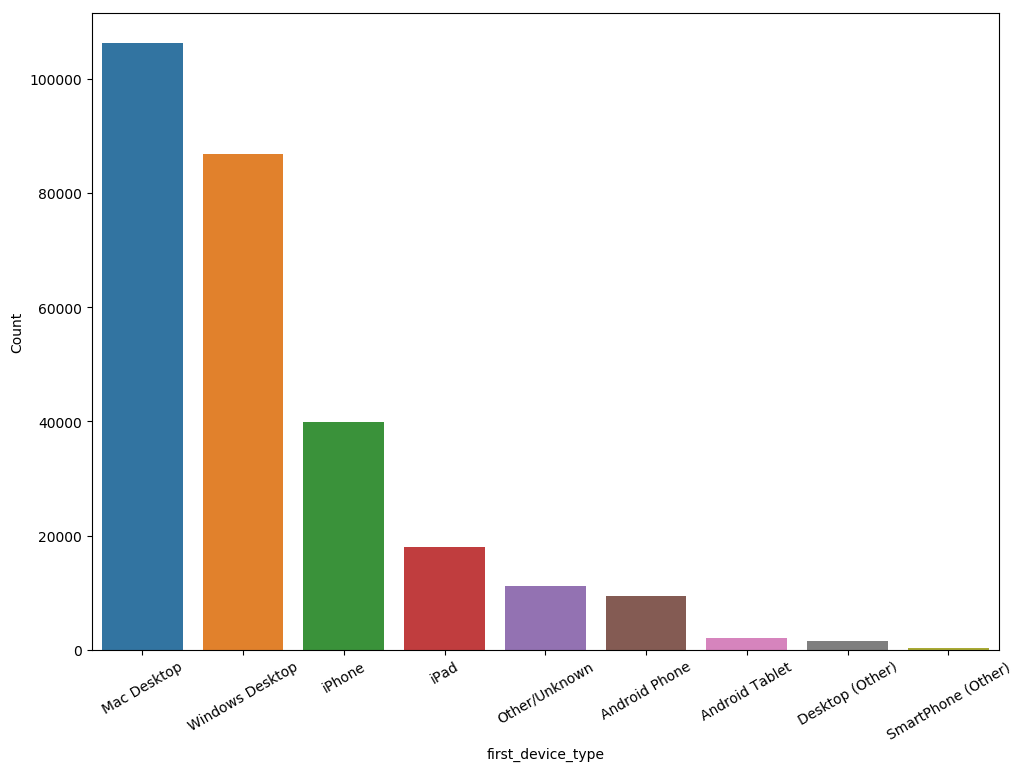

In [235]:
f_plot('first_device_type', rot = True)


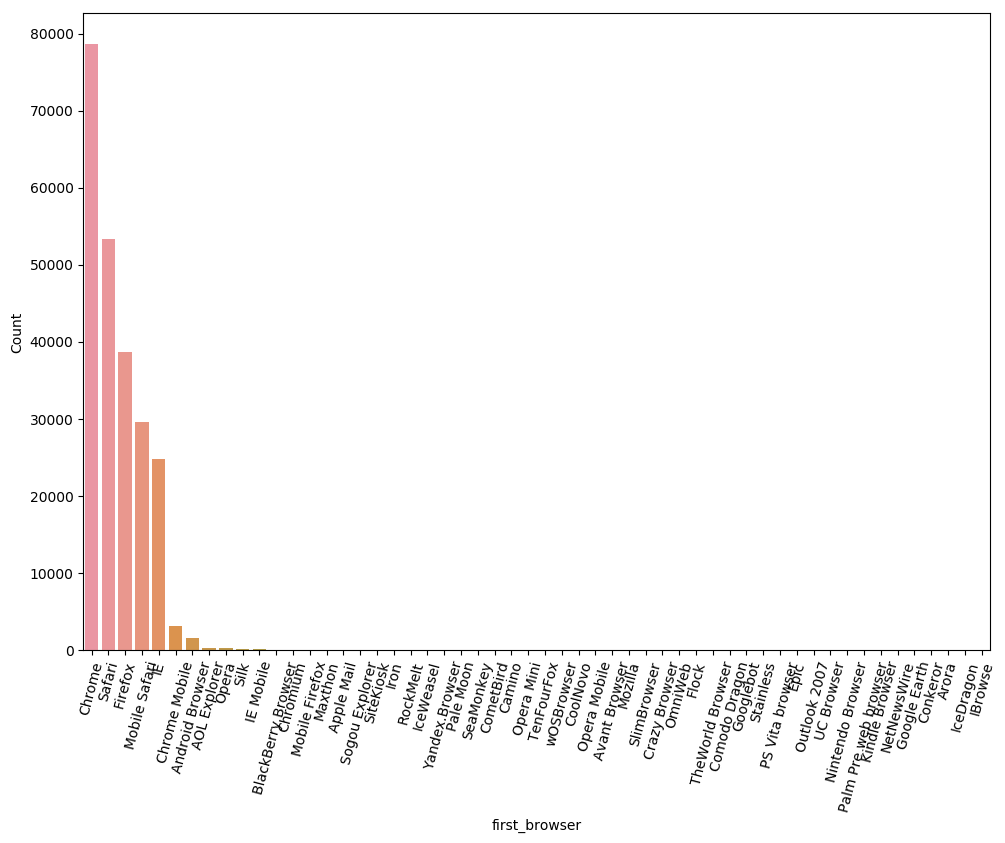

In [239]:
f_plot('first_browser', rot = True, degree = 75)


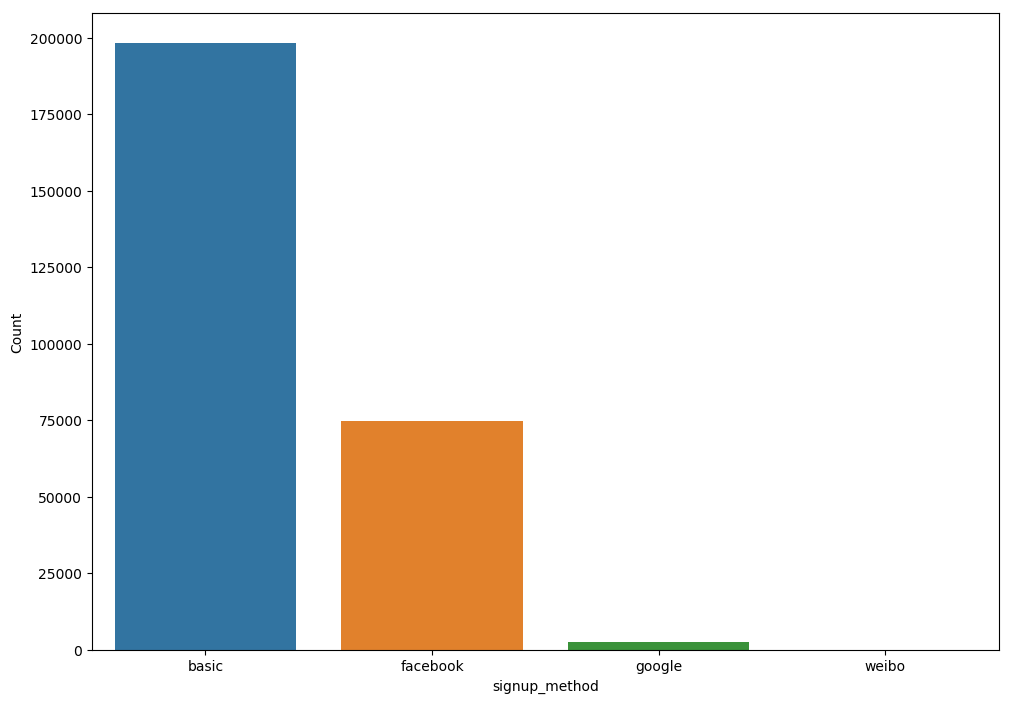

In [240]:
f_plot('signup_method')